### Import modules

In [1]:
# Standard imports
import pandas as pd
import sys 
import os
import seaborn as sns
import os
import shutil

# Local imports
os.chdir('/home/HPC/cdroin/example_DA_study_runIII_PU/master_study/analysis/tune_scan/')
#sys.path.insert(1, os.path.join(sys.path[0], '..'))
import analysis_functions 

# Apply better style
analysis_functions.apply_heatmap_style()



### 30 cm


In [2]:
# Define study
STUDY_NAME = "tune_scan_30cm_neg_oct_correct_scheme"
COLLIDER = "base_collider"
PARQUET_PATH = f"../../scans/{STUDY_NAME}/da.parquet"
CONF_MAD_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/config.yaml"
CONF_COLLIDER_PATH = f"../../scans/{STUDY_NAME}/{COLLIDER}/xtrack_0016/config.yaml"

# SAve study on EOS
SAVE_STUDY_EOS = False
# Load dataframe
df = pd.read_parquet(f"../../scans/{STUDY_NAME}/da.parquet")

# Round all numbers to 3 decimals
df = df.round(3)


df

normalized amplitude in xy-plane  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy                                         
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309                             4.500   
                                                                       60.310                             4.500   
                                                                       60.311                             4.500   
                                                                       60.312                             4.500   
                                                                       60.313                             4.500   
...                                                                                                         ...   
                                                                62.313 60.322                             4.500   
                                                                62.314 60.322                             4.625   
                                                                62.315 60.327                             4.500   
                                                                62.318 60.325                             4.500   
                                                                62.320 60.326                             4.500   

                                                                                   qx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  62.305   
                                                                       60.310  62.305   
                                                                       60.311  62.305   
                                                                       60.312  62.305   
                                                                       60.313  62.305   
...                                                                               ...   
                                                                62.313 60.322  62.313   
                                                                62.314 60.322  62.314   
                                                                62.315 60.327  62.315   
                                                                62.318 60.325  62.318   
                                                                62.320 60.326  62.320   

                                                                                   qy  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy               
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  60.309   
                                                                       60.310  60.310   
                                                                       60.311  60.311   
                                                                       60.312  60.312   
                                                                       60.313  60.313   
...                                                                               ...   
                                                                62.313 60.322  60.322   
                                                                62.314 60.322  60.322   
                                                                62.315 60.327  60.327   
                                                                62.318 60.325  60.325   
                                                                62.320 60.326  60.326   

                                                                                dqx  \
beam  name base collider num_particles_per_bunch crossing_angle qx     qy             
lhcb1 base_collider      1.150000e+11            160.0          62.305 60.309  15.0   
      

In [3]:
# Keep only relevant collider
df = df.reset_index(level=1)
df = df[df["name base collider"] == COLLIDER]

# Reshape for plotting
df_to_plot = df.pivot(index="qy", columns="qx", values="normalized amplitude in xy-plane")
df_to_plot

qx,62.305,62.306,62.307,62.308,62.309,62.310,62.311,62.312,62.313,62.314,62.315,62.318,62.320
qy,,,,,,,,,,,,,
60.309,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.310,4.500,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.311,4.500,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.312,4.500,4.5,NaN,4.500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.313,4.500,4.5,4.5,4.531,4.938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.314,4.500,4.5,4.5,4.531,4.781,5.031,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60.315,4.531,4.5,NaN,4.500,4.531,5.062,4.969,NaN,NaN,NaN,NaN,NaN,NaN
60.316,4.500,4.5,NaN,4.500,5.000,4.875,4.875,5.062,NaN,NaN,NaN,NaN,NaN
60.317,4.500,4.5,NaN,4.594,4.781,4.625,5.000,5.094,4.938,NaN,NaN,NaN,NaN


ValueError: operands could not be broadcast together with shapes (21,13) (13,21) 

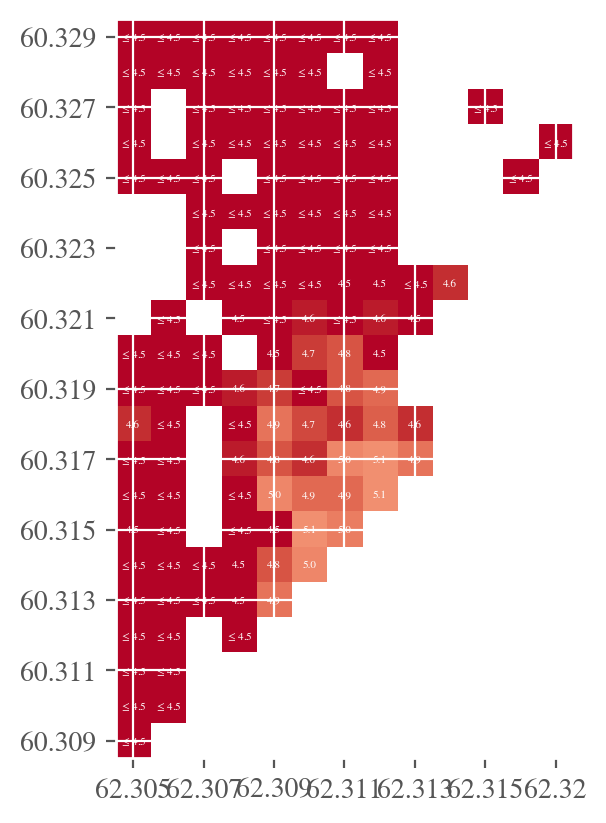

In [4]:

# Load configuration files
conf_mad = analysis_functions.load_config(CONF_MAD_PATH)['config_mad']
conf_collider = analysis_functions.load_config(CONF_COLLIDER_PATH)["config_collider"]
analysis_functions.plot_heatmap(
    df_to_plot,
    STUDY_NAME + '_' + COLLIDER,
    link=None,
    plot_contours=True,
    conf_mad=conf_mad,
    conf_collider=conf_collider,
    type_crossing="flatvh",
    betx=0.3,
    bety=0.3,
    Nb = True,
    green_contour = 5.5,
    extended_diagonal=False,
    vmin = 4.5,
    vmax = 7,
)
if SAVE_STUDY_EOS:
    path_archive, path_EOS = analysis_functions.copy_study_on_eos(STUDY_NAME)
    #analysis_functions.archive_and_clean(path_archive, path_EOS)